<a href="https://colab.research.google.com/github/jparkgit/ESAA-23-2/blob/main/Week2_Frisesh_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

In [ ]:
chipotle = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep="\t")
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 3. Assign it to a variable called chipo.

In [ ]:
chipo = chipotle
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [ ]:
top5items = chipo.groupby('item_name').quantity.sum().sort_values(ascending=False)[0:5]
top5items

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

<Axes: xlabel='item_name'>

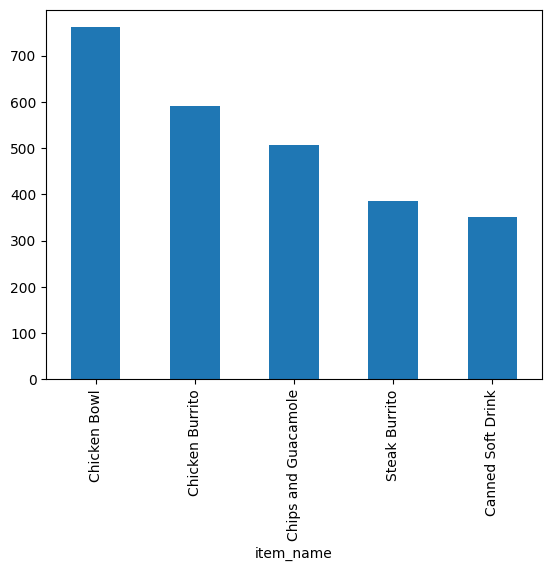

In [ ]:
top5items.plot(kind='bar')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0, 0.5, 'quantity')

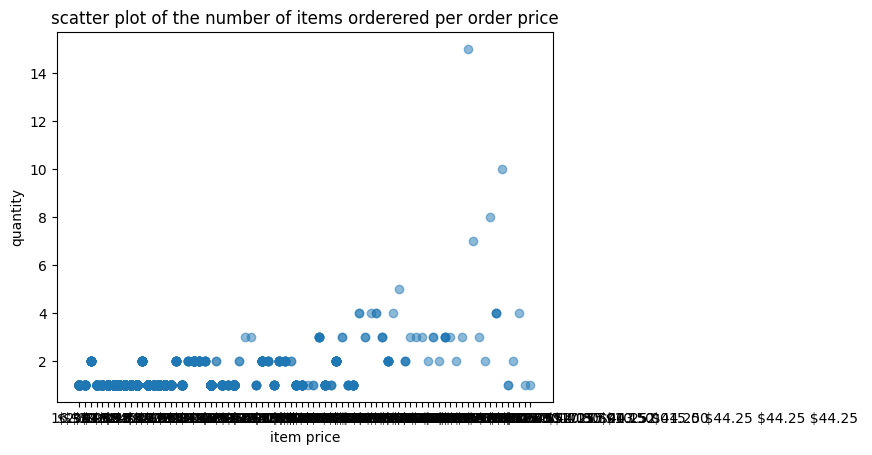

In [ ]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x = chipo['item_price']*chipo['quantity'],
    y = chipo['quantity'],
    alpha = 0.5
)
axes1.set_title("scatter plot of the number of items orderered per order price")
axes1.set_xlabel('order price')
axes1.set_ylabel('quantity')

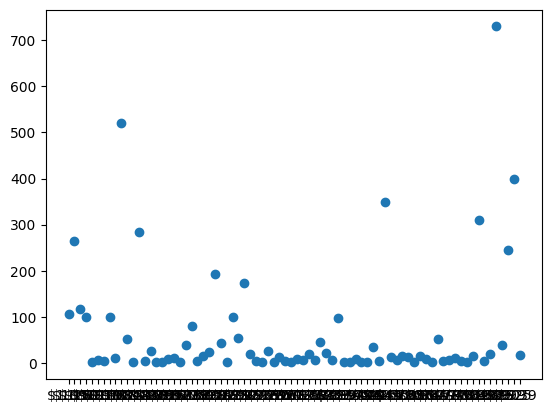

In [ ]:
fig, ax = plt.subplots()
price_cnt = chipo.groupby('item_price').quantity.sum()
ax.scatter(price_cnt.index.tolist(), price_cnt.tolist())

In [ ]:
# get rid of dollar sign
[(value[1:]) for value in chipo.item_price][:5]

['2.39 ', '3.39 ', '3.39 ', '2.39 ', '16.98 ']

In [ ]:
# empty space in the end
[(value[1:-1]) for value in chipo.item_price][:5]

['2.39', '3.39', '3.39', '2.39', '16.98']

In [ ]:
# change data type to float because it used to have $
[float(value[1:-1]) for value in chipo.item_price][:5]

[2.39, 3.39, 3.39, 2.39, 16.98]

In [ ]:
# create new column in dataframe of the edited item_price
chipo['item_price2'] = [float(value[1:-1]) for value in chipo.item_price]
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,item_price2
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [ ]:
# group the dataframe by order id and sum the numerics
by_orders = chipo.groupby('order_id').sum()
by_orders

<ipython-input-45-a644fe0b86be>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_orders = chipo.groupby('order_id').sum()


,quantity,item_price2
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


Text(0.5, 1.0, 'Number of items ordered per order price')

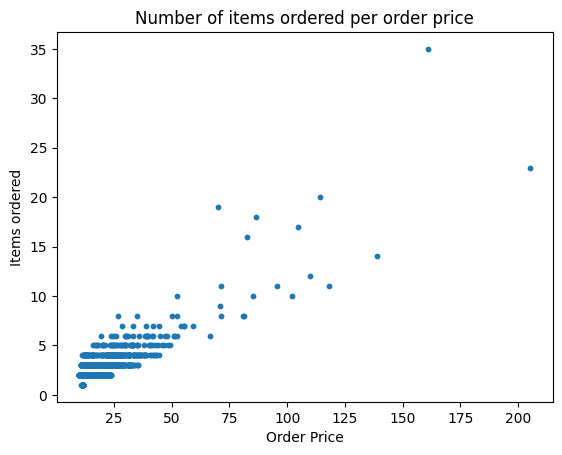

In [ ]:
plt.scatter(x= by_orders['item_price2'], y=by_orders['quantity'], s=10)
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')

### Step 7. BONUS: Create a question and a graph to answer your own question.

Draw a scatterplot showing the relationship between the quantity and the items sold

Text(0, 0.5, 'quantity')

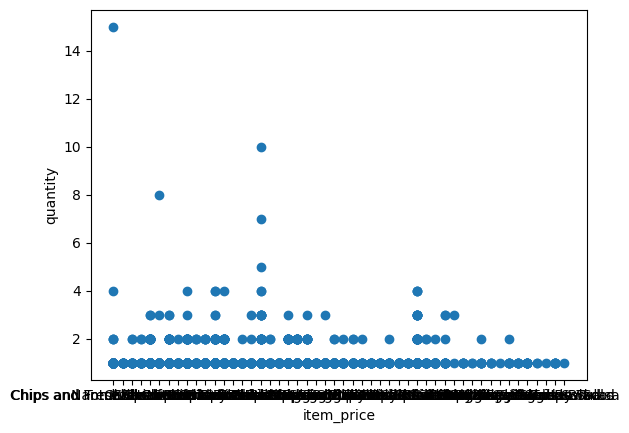

In [ ]:
scatter_plot=plt.figure()
axes1= scatter_plot.add_subplot(1,1,1)
axes1.scatter(chipo['item_name'], chipo['quantity'])
axes1.set_xlabel('item_price')
axes1.set_ylabel('quantity')